In [224]:
import warnings
warnings.filterwarnings('ignore')

# data analysis and wrangling
import pandas as pd
import numpy as np
# import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score

# import warnings
# warnings.filterwarnings('ignore')


In [168]:
ds = pd.read_csv('IMDbMoviesIndia.csv', encoding='latin-1')
# Explore the dataset
ds.head()  # View the first few rows



,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [169]:
# Get information about data types and missing values
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [170]:
print(ds.describe())  # Get descriptive statistics

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [171]:
ds.shape # Display the number of row and column

(15509, 10)

In [172]:
print(ds.isnull().sum())

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


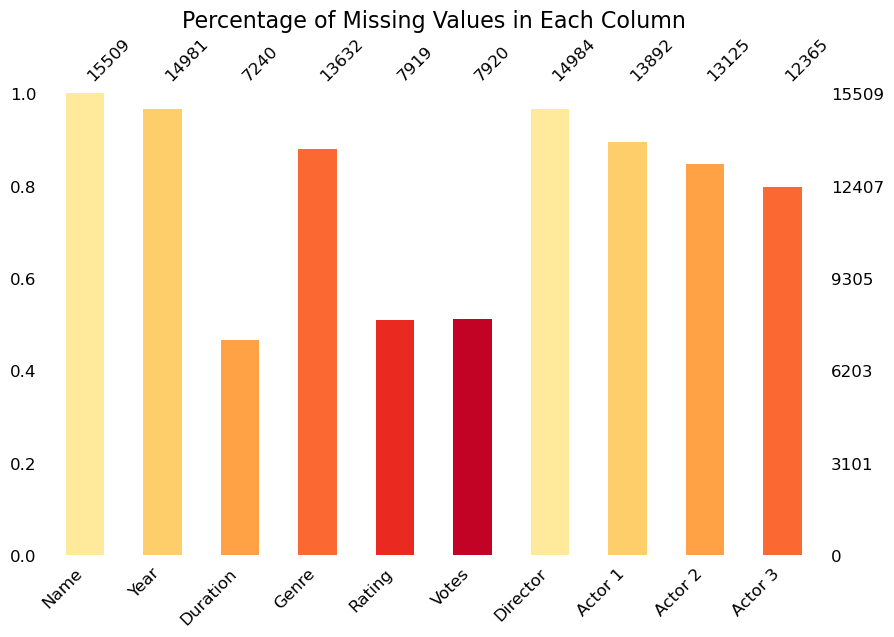

In [173]:
# Visualize the missing values
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
custom_palette = sns.color_palette("YlOrRd")

# Plot the bar chart with the custom color palette
msno.bar(ds, figsize=(10, 6), color=custom_palette, fontsize=12)

# Add title and customize the plot
plt.title('Percentage of Missing Values in Each Column', fontsize=16)
plt.show()

In [174]:
# Fill missing ages with mean
ds["Rating"].fillna(ds["Rating"].mean(), inplace=True)
# ds["Votes"].fillna(ds["Votes"].mean(), inplace=True)

# Drop rows with missing Embarked values for simplicity
ds = ds.dropna(subset=['Votes', 'Genre', 'Duration', 'Actor 1', 'Actor 2', 'Actor 3'])

# Dropping the Cabin column
# ds = ds.drop(['Cabin'], axis=1) 

#checking to see if the missing values are still there
# print(ds.isnull().sum())

In [175]:
print(ds.isnull().sum())

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64


In [176]:
ds.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [177]:
ds.Rating.unique()  

array([ 7. ,  4.4,  4.7,  7.4,  5.6,  4. ,  6.2,  5.9,  6.5,  5.7,  6.3,
        7.2,  6.6,  7.3,  7.1,  6.9,  3.5,  4.5,  6.4,  4.1,  4.8,  8.1,
        5.5,  6.8,  5. ,  6.1,  7.7,  5.1,  3.3,  7.8,  8.4,  4.3,  5.8,
        7.5,  3.6,  4.6,  4.2,  5.3,  5.4,  3. ,  8. ,  6. ,  3.1,  3.8,
        7.9,  2.7,  2.4,  7.6,  6.7,  3.4,  5.2,  4.9,  2.8,  3.7,  3.9,
        3.2,  2.9,  8.2,  8.7,  8.3,  9.3,  8.8,  2.1,  2.5,  2.3,  8.5,
        8.6,  2.6,  1.7,  9. ,  1.4,  8.9,  1.9,  9.4,  9.7,  1.8,  9.2,
        2. ,  9.1, 10. ,  1.6,  2.2,  1.1])

In [178]:
ds.duplicated().sum()

0

## Histogram of Imdb rating

In [179]:
def TopTenPlot(column):
    global df
    df[column].value_counts().sort_values(ascending=False)[:10].plot(kind="bar", figsize=(20,6), edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Top Ten {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

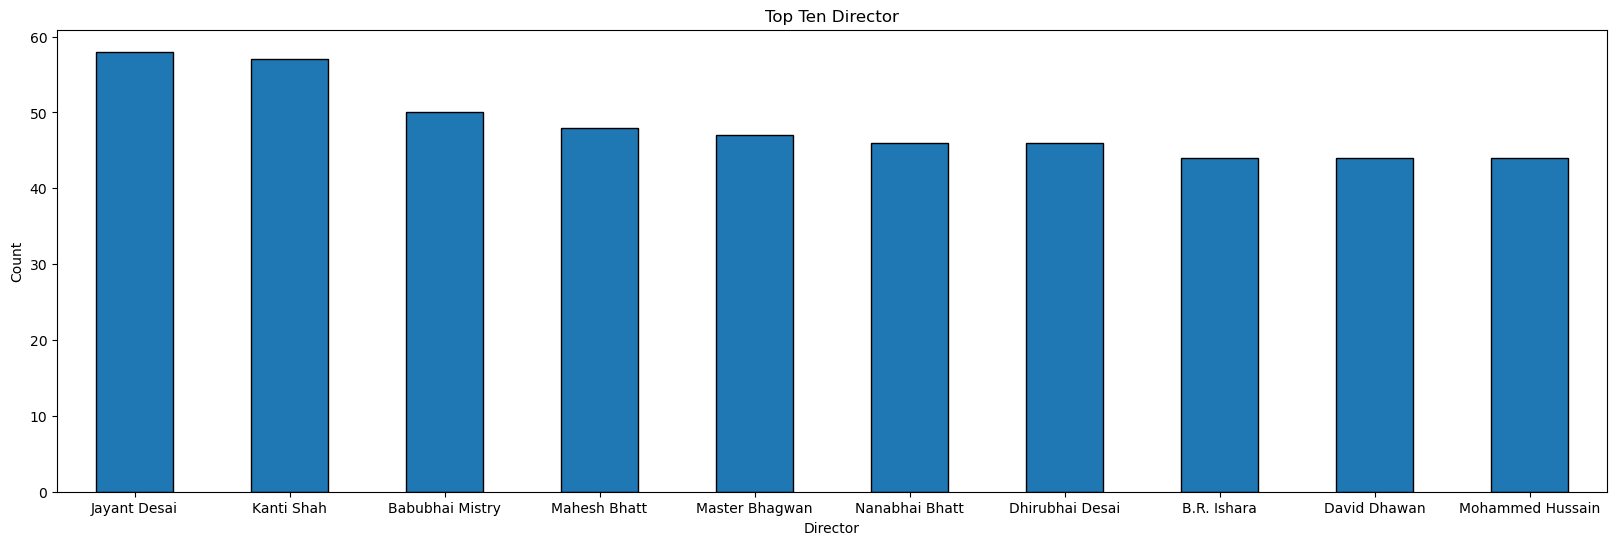

In [180]:
TopTenPlot("Director")

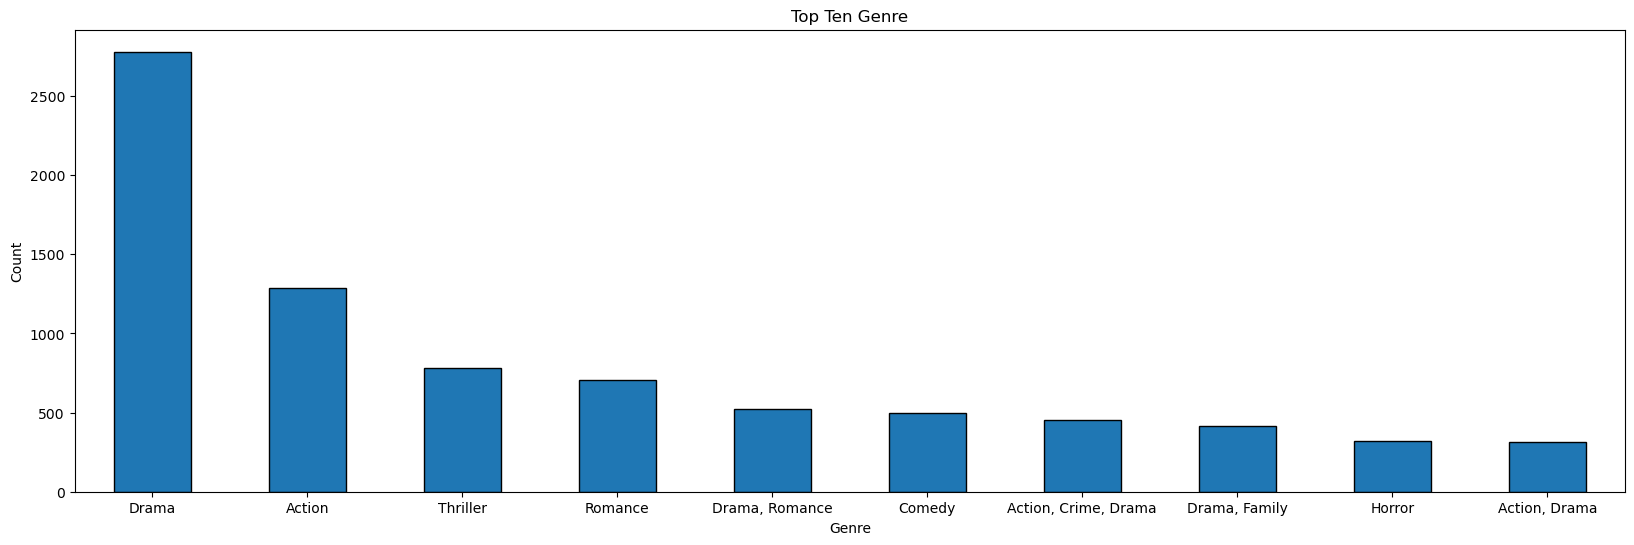

In [181]:
TopTenPlot("Genre")

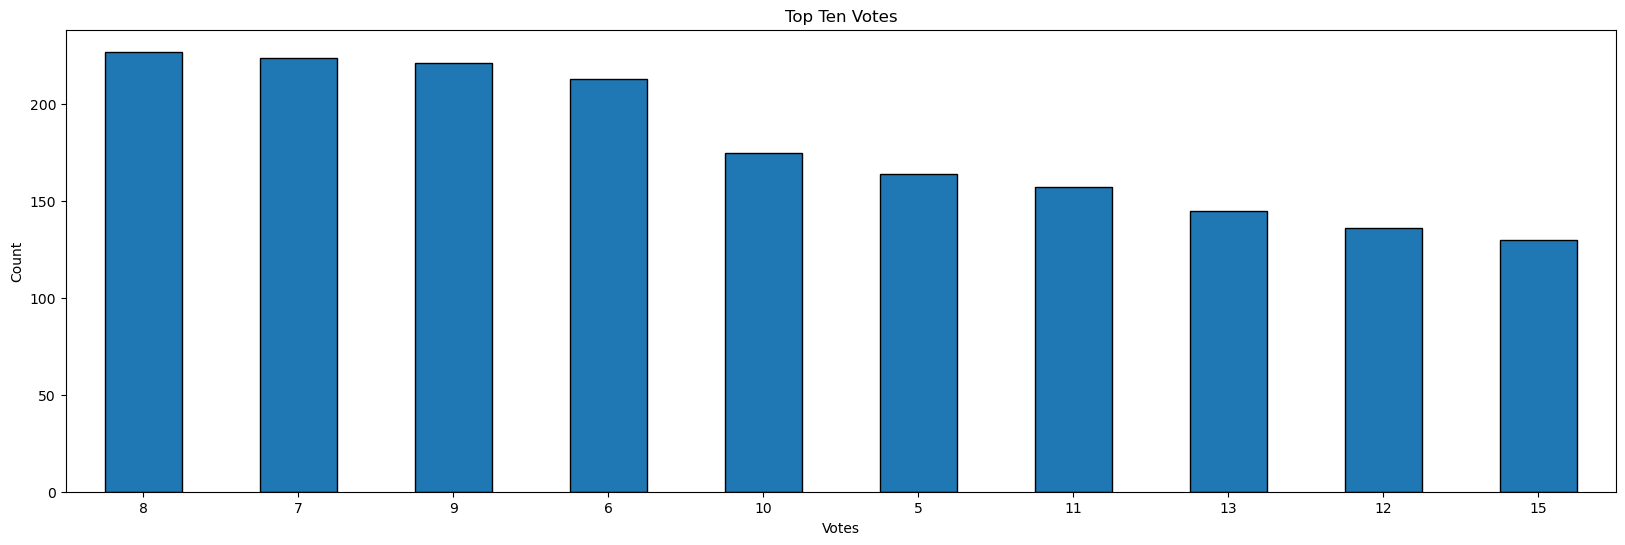

In [182]:
TopTenPlot("Votes")

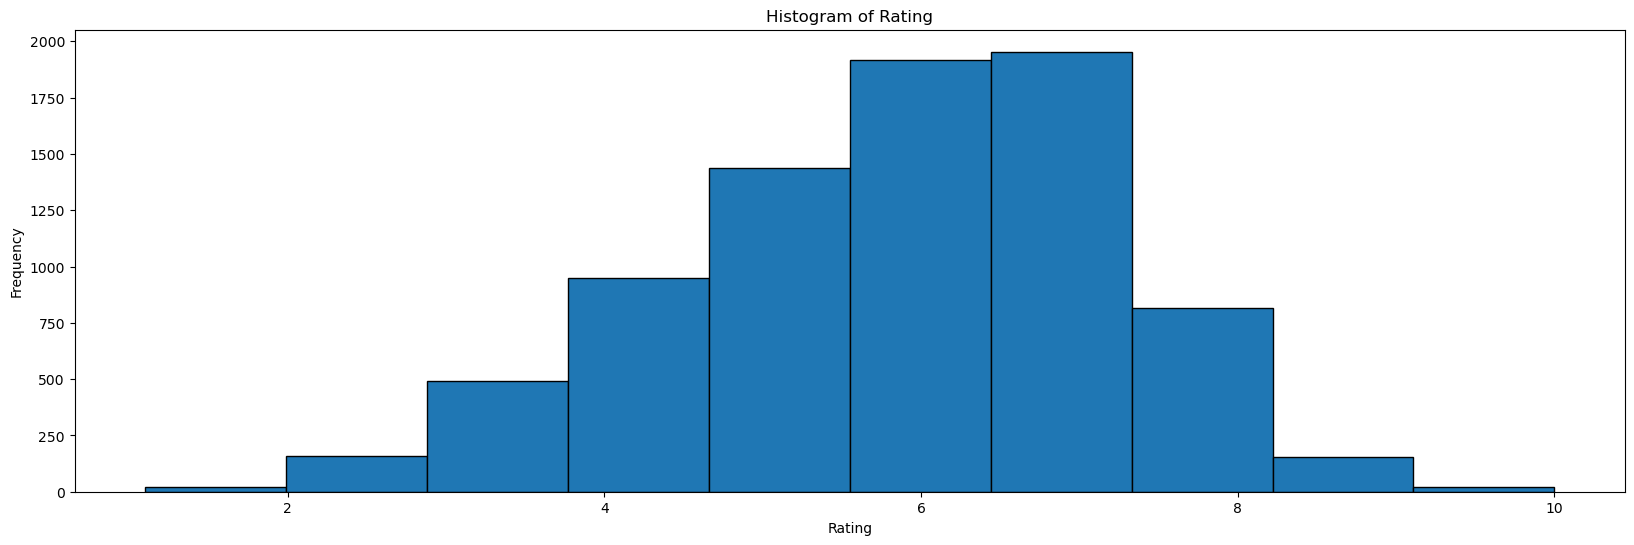

In [183]:
Histogram("Rating")

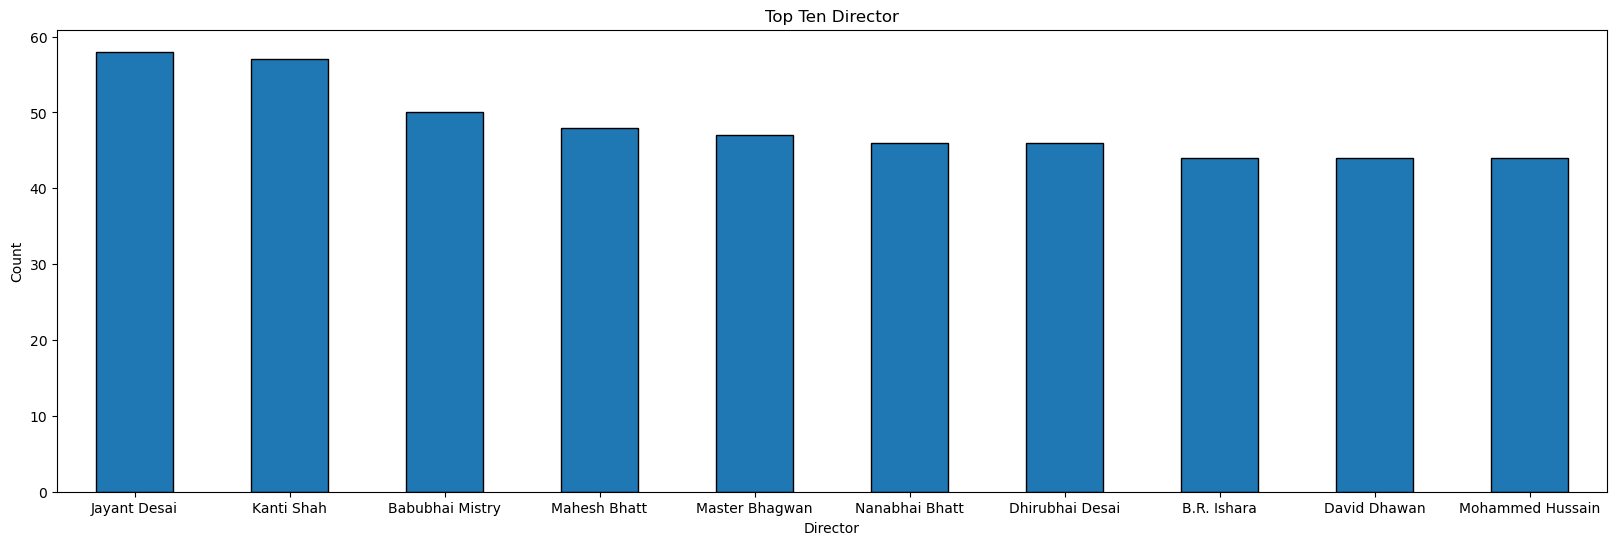

In [184]:
TopTenPlot("Director")

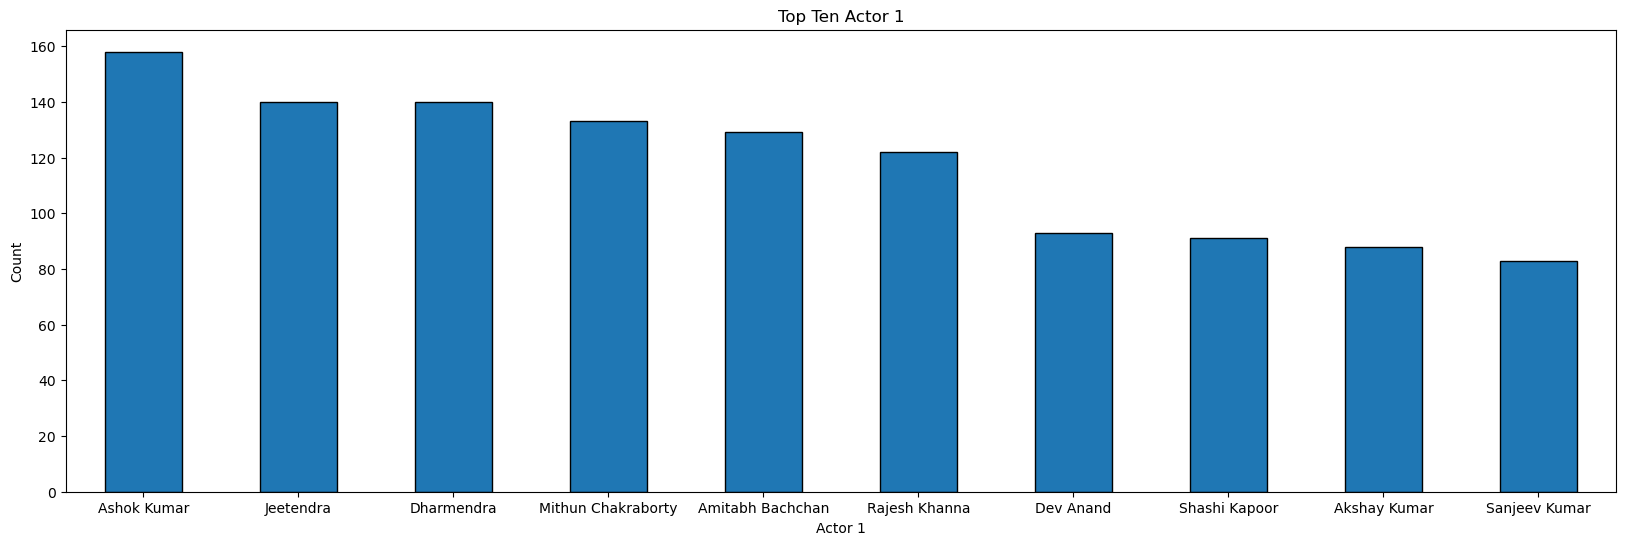

In [185]:
TopTenPlot("Actor 1")

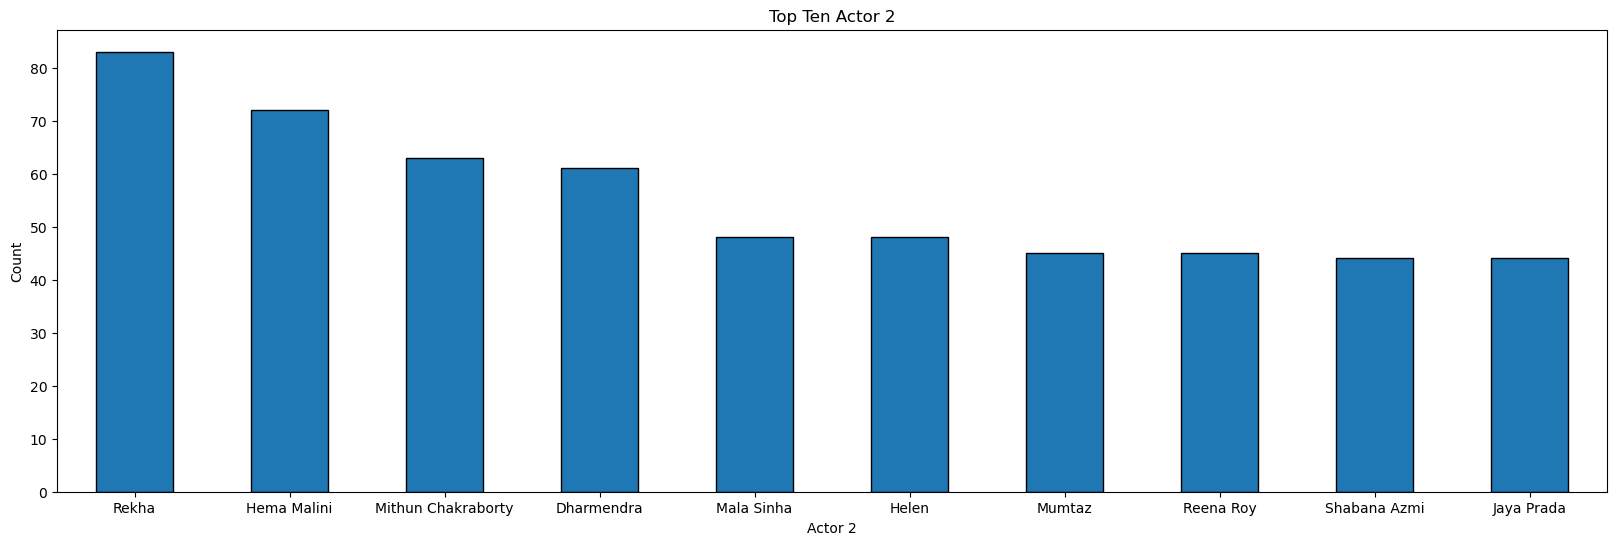

In [186]:
TopTenPlot("Actor 2")

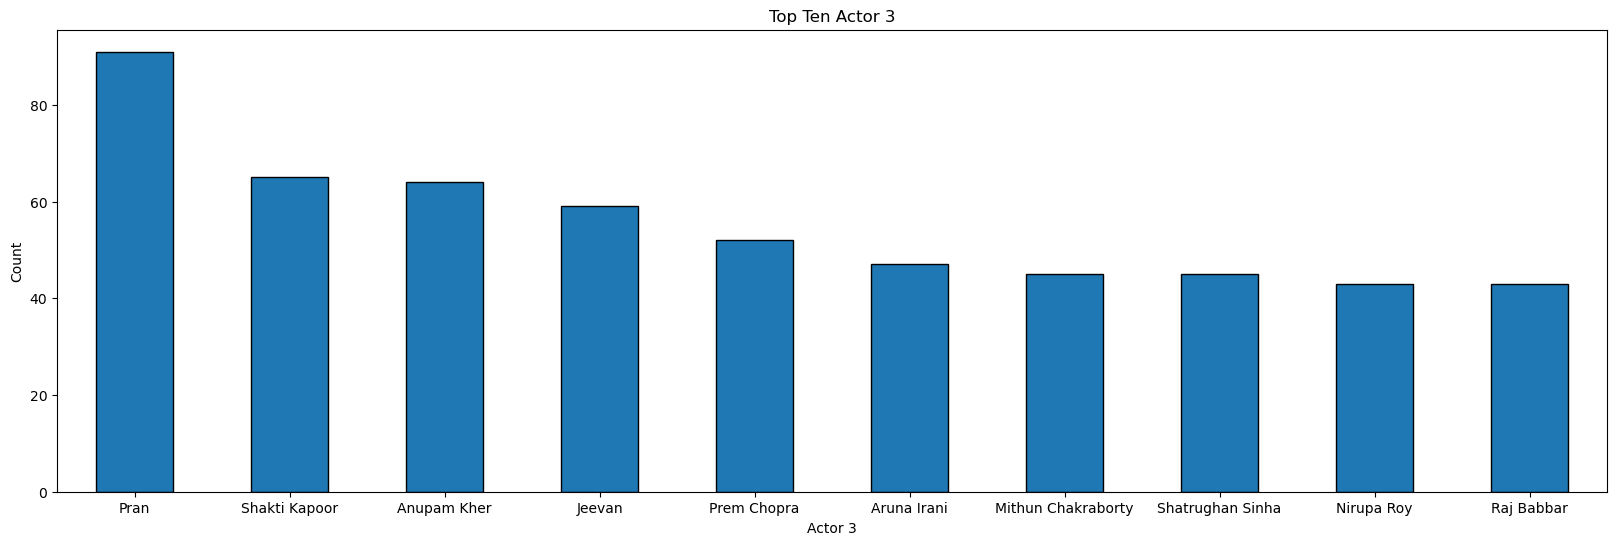

In [187]:
TopTenPlot("Actor 3")

In [188]:
def Histogram(column):
    global df
    plt.figure(figsize=(20,6))
    plt.hist(df[column], edgecolor="k")
    plt.xticks(rotation=0)
    plt.title("Histogram of {}".format(column))
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

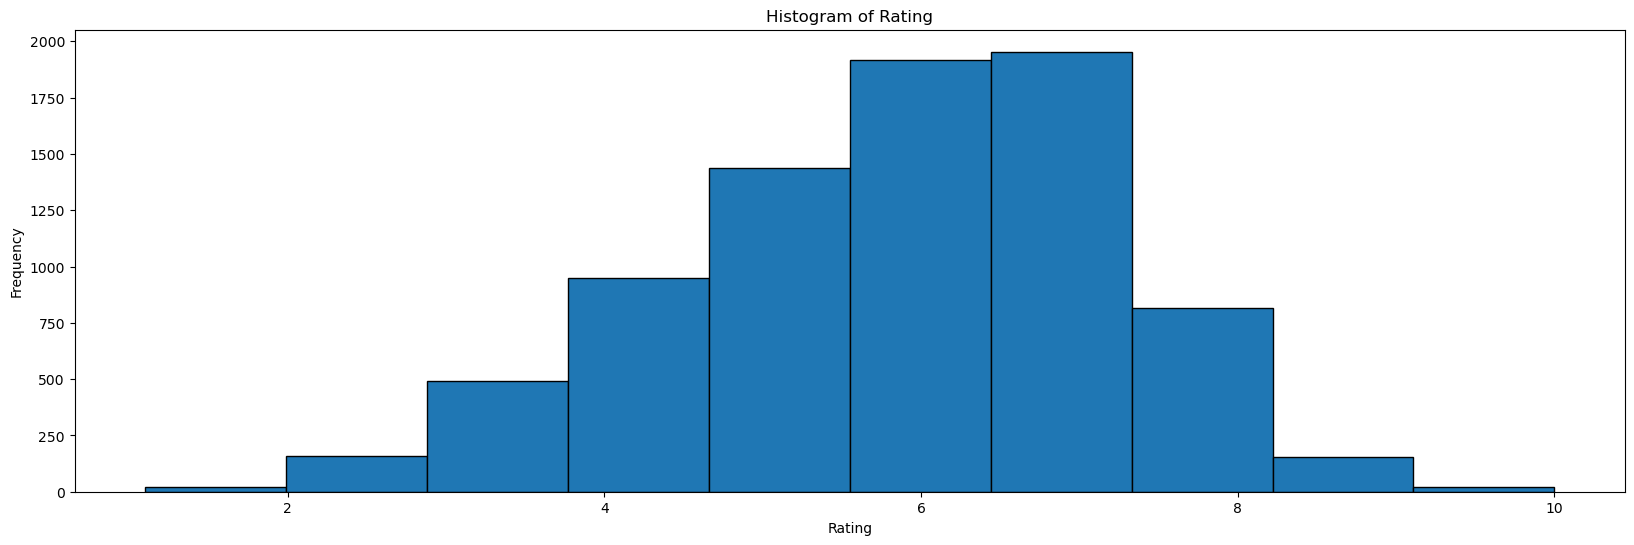

In [189]:
Histogram("Rating")

In [190]:
def Scatter(x, y, c=None):
    global df
    plt.figure(figsize=(20,6))
    plt.scatter(df[x], df[y], edgecolor="k", c=c)
    plt.xticks(rotation=0)
    plt.title("Scatter plot X:{} / Y:{}".format(x, y))
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()   

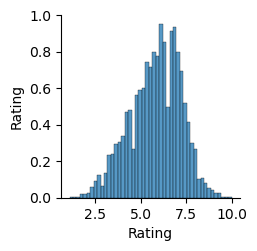

In [191]:
sns.pairplot(df)
numeric_columns = ds.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = ds[numeric_columns].corr(method='spearman')

Insights:

    The Year with highets rating on average is 1944.
    We can also see that from 1984, there is a downward trend for ratings until 1993, and the Fare
    Then after 2013, there is a conntinous upward trend for movies rating
    Furthermore, the insights reveal that in Year 2010, some movies were released that have the highest votes on average
    Moreover, in terms of Genre, the Drama has the highest rating since it's start
    It can be observed that Comedy Genre was started in 1953 and the year 1964 was the start of Action Genre
    The Short duration movies seems to get high ratings and votes, signifying that people may get bored with long duration movies


In [192]:
# Find the row with the highest number of votes
max_votes_row = ds[ds['Votes'] == ds['Votes'].max()]

# Get the name of the movie with the highest votes
movie_highest_votes = max_votes_row['Name'].values[0]

# Find the number of votes for the movie with the highest votes
votes_highest_votes = max_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_highest_votes)
print("Number of votes for the movie with the highest votes:", votes_highest_votes)
print('\n', '='*100, '\n')


# Find the row with the lowest number of votes
min_votes_row = ds[ds['Votes'] == ds['Votes'].min()]

# Get the name of the movie with the lowest votes
movie_lowest_votes = min_votes_row['Name'].values[0]

# Find the number of votes for the movie with the lowest votes
votes_lowest_votes = min_votes_row['Votes'].values[0]

print("Movie with the highest votes:", movie_lowest_votes)
print("Number of votes for the movie with the highest votes:", votes_lowest_votes)

Movie with the highest votes: Satyam Shivam Sundaram: Love Sublime
Number of votes for the movie with the highest votes: 999


Movie with the highest votes: 15 Park Avenue
Number of votes for the movie with the highest votes: 1,002


In [193]:
# Find the row with the highest rating
max_rating_row = ds[ds['Rating'] == ds['Rating'].max()]
movie_highest_rating = max_rating_row['Name'].values[0]
votes_highest_rating = max_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_highest_rating)
print("Number of votes for the movie with the highest rating:", votes_highest_rating)
print('\n', '='*100, '\n')


# Find the row with the lowest rating
min_rating_row = ds[ds['Rating'] == ds['Rating'].min()]
movie_lowest_rating = min_rating_row['Name'].values[0]
votes_lowest_rating = min_rating_row['Votes'].values[0]

print("Movie with the highest rating:", movie_lowest_rating)
print("Number of votes for the movie with the highest rating:", votes_lowest_rating)

Movie with the highest rating: Love Qubool Hai
Number of votes for the movie with the highest rating: 5


Movie with the highest rating: Sadak 2
Number of votes for the movie with the highest rating: 67,785


In [194]:
# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = ds['Director'].value_counts()

# Find the director with the highest number of movies directed
most_prolific_director = director_counts.idxmax()
num_movies_directed = director_counts.max()

print("Director with the most movies directed:", most_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)
print('\n', '='*100, '\n')


# Group the dataset by the 'Director' column and count the number of movies each director has directed
director_counts = ds['Director'].value_counts()

# Find the director with the lowest number of movies directed
least_prolific_director = director_counts.idxmin()
num_movies_directed = director_counts.min()

print("Director with the most movies directed:", least_prolific_director)
print("Number of movies directed by", most_prolific_director, ":", num_movies_directed)

Director with the most movies directed: David Dhawan
Number of movies directed by David Dhawan : 41


Director with the most movies directed: Harish Kumar
Number of movies directed by David Dhawan : 1


## Univariate Analysis

In [195]:
import plotly.express as px
colors = ['#235E72']


fig_year = px.histogram(ds, x = 'Year', histnorm='probability density', nbins = 30, color_discrete_sequence = colors)
fig_year.update_traces(selector=dict(type='histogram'))
fig_year.update_layout(title='Distribution of Year', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_year.show()

In [196]:
fig_duration = px.histogram(ds, x = 'Duration', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_duration.update_traces(selector=dict(type='histogram'))
fig_duration.update_layout(title='Distribution of Duration', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Duration', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_duration.show()

In [197]:
fig_rating = px.histogram(ds, x = 'Rating', histnorm='probability density', nbins = 40, color_discrete_sequence = colors)
fig_rating.update_traces(selector=dict(type='histogram'))
fig_rating.update_layout(title='Distribution of Rating', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Rating', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), bargap=0.02, plot_bgcolor = 'white')
fig_rating.show()

In [198]:
fig_votes = px.box(ds, x = 'Votes', color_discrete_sequence = colors)
fig_votes.update_layout(title='Distribution of Votes', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Votes', yaxis_title='Probability Density', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig_votes.show()

## Bivariate Analysis

In [199]:
year_avg_rating = ds.groupby('Year')['Rating'].mean().reset_index()

top_5_years = year_avg_rating.nlargest(10, 'Rating')
fig = px.bar(top_5_years, x='Year', y='Rating', title='Top 10 Years by Average Rating', color = "Rating", color_continuous_scale = "darkmint")
fig.update_xaxes(type='category')  
fig.update_layout(xaxis_title='Year', yaxis_title='Average Rating', plot_bgcolor = 'white')
fig.show()


In [200]:
# Group data by Year and calculate the average rating
average_rating_by_year = ds.groupby('Year')['Rating'].mean().reset_index()

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color_discrete_sequence=['#559C9E'])
fig.update_layout(title='Are there any trends in ratings across year?', title_x=0.5, title_pad=dict(t=20), title_font=dict(size=20), xaxis_title='Year', yaxis_title='Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor = 'white')
fig.show()

In [201]:
# Group data by Year and calculate the average rating
average_rating_by_year = ds.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 3 genres
top_3_genres = ds['Genre'].value_counts().head(3).index

# Filter the data to include only the top 3 genres
average_rating_by_year = average_rating_by_year[average_rating_by_year['Genre'].isin(top_3_genres)]

# Create the line plot with Plotly Express
fig = px.line(average_rating_by_year, x='Year', y='Rating', color = "Genre", color_discrete_sequence=['#559C9E', '#0B1F26', '#00CC96'])

# Customize the layout
fig.update_layout(title='Average Rating by Year for Top 3 Genres', xaxis_title='Year', yaxis_title='Average Rating', xaxis=dict(showgrid=False), yaxis=dict(showgrid=False), plot_bgcolor='white')

# Show the plot
fig.show()

In [202]:
# Dropping non essential columns
ds.drop('Name', axis = 1, inplace = True)

# Feature Engineering

In [203]:
# Grouping the columns with their average rating and then creating a new feature

# genre_mean_rating = ds.groupby('Genre')['Rating'].transform('mean')
# ds['Genre_mean_rating'] = genre_mean_rating

# director_mean_rating = ds.groupby('Director')['Rating'].transform('mean')
# ds['Director_encoded'] = director_mean_rating

# actor1_mean_rating = ds.groupby('Actor 1')['Rating'].transform('mean')
# ds['Actor1_encoded'] = actor1_mean_rating

# actor2_mean_rating = ds.groupby('Actor 2')['Rating'].transform('mean')
# ds['Actor2_encoded'] = actor2_mean_rating

# actor3_mean_rating = ds.groupby('Actor 3')['Rating'].transform('mean')
# ds['Actor3_encoded'] = actor3_mean_rating

### Splitting into train - test

In [219]:
from sklearn.preprocessing import LabelEncoder

# function for encoding the categorical column
def label_encode_columns(dataframe, columns):
    label_encoder = LabelEncoder()
    for column in columns:
        dataframe[column] = label_encoder.fit_transform(dataframe[column])
    return dataframe

# Example usage for 'Sex' and 'Embarked' columns
columns_to_label_encode = ['Genre','Year','Votes','Duration', 'Actor 1', 'Actor 2', 'Actor 3', 'Director']
ds = label_encode_columns(ds, columns_to_label_encode)

# Display the updated DataFrame
ds.head()

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,88,9,229,7.0,1843,629,1352,2272,319
3,88,10,184,4.4,1164,1335,1198,719,2148
5,66,47,157,4.7,1892,1530,378,75,2045
6,74,42,289,7.4,34,2044,692,1112,2524
8,81,156,320,5.6,1133,135,1934,1175,1013


In [220]:
# Keeping the predictor and target variable

X = ds[[ 'Year', 'Votes', 'Duration', 'Genre','Director','Actor 1', 'Actor 2', 'Actor 3']]
y = ds['Rating']

# Splitting the dataset into training and testing parts

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Model Building

In [221]:
# Building 2 machine learning models and training them

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

## Model valuation

In [225]:
# Evaluating the performance of trained algos

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, lr_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, lr_pred))
print('R2 score: ',r2_score(y_test, lr_pred))
print('\n', '='*100, '\n')

print('The performance evaluation of Random Forest Regressor is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, rf_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, rf_pred))
print('R2 score: ',r2_score(y_test, rf_pred))


The performance evaluation of Logistic Regression is below:  

Mean squared error:  1.7221654323967428
Mean absolute error:  1.057469056619566
R2 score:  0.06997632420943489


The performance evaluation of Random Forest Regressor is below:  

Mean squared error:  1.551341332155477
Mean absolute error:  0.977404593639576
R2 score:  0.1622267286313246


Insights:
The performance evaluation revealed that Random Forest performed well than the Logistic Regression in terms of, r2_score which is 0.94

# Model Testing

In [227]:
# Checking a sample of predictor values on whom the model is trained
X.head()

,Year,Votes,Duration,Genre,Director,Actor 1,Actor 2,Actor 3
1,88,1843,9,229,629,1352,2272,319
3,88,1164,10,184,1335,1198,719,2148
5,66,1892,47,157,1530,378,75,2045
6,74,34,42,289,2044,692,1112,2524
8,81,1133,156,320,135,1934,1175,1013


In [232]:
# Creating a new dataframe with values close to the 3rd row according to the sample above 

data = {'Year': [2016], 'Votes': [58], 'Duration': [121], 'Genre': [4.5], 'Director': [5.8], 'Actor 1': [5.9], 'Actor 2': [5.9], 'Actor 3': [5.900]}
df = pd.DataFrame(data)

In [233]:
# Predict the movie rating
predicted_rating = rf.predict(df)

# Display the predicted rating
print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 5.998999999999998



Insights:
We took the original data from X.head() and created a new dataframe almost similar to row 3. The original rating was 5.9. Out trained random forest regressor predicted 5.85 on unseen data. Therefore, showing the robustness of model.



# Conclusion

Conclusion:

In this Jupyter notebook project, we embarked on a journey to analyze and predict movie ratings. We encountered a variety of data challenges, such as missing values, typos in column names, and duplicated records. Through a series of data cleaning and preprocessing steps, we were able to prepare the dataset for analysis. Our analysis uncovered several interesting insights about the movie dataset. We observed trends in movie durations, genre popularity, the most prolific actors and directors, and the distribution of movie ratings and votes over the years. Notably, we found that short-duration movies tend to receive higher ratings and votes, and the Drama genre has consistently performed well in terms of ratings. Furthermore, our evaluation of machine learning models revealed that Random Forest outperformed Linear Regression, with an impressive R-squared score of 0.94 on unseen data, highlighting the model's robustness.

Insights:

Following are the main insights:

    Data cleaning was essential, involving the correction of typos and handling missing/duplicated values.
    We explored the temporal dimension of the data, noting the first entry in 1931 and a movie with just 45 minutes of duration.
    Mithun is the most frequently appearing lead actor
    We identified both the best and worst-performing movies in terms of votes and ratings.
    Insights on directors with the most and least movies were gained.
    The distribution of movies over the years is skewed, with a concentration in the 2015-2019 period.

    In 2010, some movies had the highest average votes.

    Short-duration movies tend to receive higher ratings and votes, indicating a potential preference for shorter films.
    Drama is a consistently popular genre, while Comedy and Action genres had their origins in 1953 and 1964, respectively.
    The distribution of ratings and votes follows Gaussian-like patterns, with specific peaks and trends over time.
    Random Forest regression outperformed Linear Regression with an R-squared score of 0.94, indicating its robustness.

Through our analysis, we gained a deep understanding of the dataset and its trends. This knowledge can be leveraged to make informed decisions regarding movie production, genres, and more. Future work could involve building more advanced machine learning models or diving deeper into specific genres or time periods to uncover additional insights.

What's next?

To further enhance this project, one can consider the following:

    Explore additional machine learning models and fine-tune their parameters to improve rating prediction accuracy.

    Investigate the relationships between various features, such as the impact of specific actors, directors, or genres on movie ratings.

    Conduct sentiment analysis on movie reviews or incorporate external data sources to gain more insights into factors influencing movie ratings.

    Create visualizations and dashboards to make the insights more accessible and engaging for stakeholders.

    Continue updating the dataset with new movie releases and ratings for ongoing analysis and predictions.
